Анализ зарплат

EDA (exploratory data analysis, разведывательный анализ данных)

In [59]:
import pandas as pd

In [60]:
df = pd.read_csv('DataScienceJobs.csv')
df.head()

,name,address,experience,skills,sal_from,sal_to
0,Начинающий специалист по работе с нейросетям,Санкт-Петербург,От 1 года до 3 лет,"Разработка технических заданий, Python, Сбор и...",55000,60000
1,Junior Data Engineer,Нижний Новгород,От 1 года до 3 лет,"SQL, jvm, Hadoop",150000,200000
2,ML-инженер,Москва,Нет опыта,"Знания математики, алгоритмов, структур данных...",150000,170000
3,Data Scientist,Москва,От 1 года до 3 лет,"Python, Machine Learning, Математическое модел...",180000,200000
4,Python Developer (Junior),Томск,От 1 года до 3 лет,"Python, Git, ООП, MySQL",60000,110000


В нашем наборе данных есть категориальные данные (name, address, experience, skills), а также количественные непрерывные данные (sal_from, sal_to)

С категориальными данными можно построить частотные таблицы, а также найти моду (самое часто встречаемое значение)

Строю частотную таблицу

In [61]:
df['name'].value_counts()

name
Data Scientist                                       36
Data Engineer                                        18
Senior Data Scientist                                 8
Machine Learning Engineer                             6
ML Engineer                                           6
                                                     ..
MLOps/ML Инженер                                      1
Менеджер по управлению данными                        1
Data analyst                                          1
Computer Vision Engineer                              1
Автор дисциплины "Задачи NLP в машинном обучении"     1
Name: count, Length: 246, dtype: int64

Уникальных 246 из 360 

Количество уникальных названий вакансий

In [62]:
df['name'].nunique()

246

Мода (часто встречаемое название вакансии)

In [63]:
df['name'].mode()

0    Data Scientist
Name: name, dtype: object

Возможно различное наименование вакансии

In [64]:
df[(df['name'].str.contains('Data Scientist')) | (df['name'].str.contains('Data scientist')) | (df['name'].str.contains('data scientist'))].shape

(151, 6)

Города в которых предлагают вакансии

In [65]:
df['address'].value_counts()

address
Москва                188
Санкт-Петербург        40
Московская область     28
Новосибирск            27
Нижний Новгород        15
Екатеринбург           15
Казань                 15
Тюмень                 11
Томск                  10
Сочи                    8
Владивосток             2
Астрахань               1
Name: count, dtype: int64

Процентные значения (частотная таблица в процентах)

In [66]:
df['address'].value_counts(normalize=True) * 100

address
Москва                52.222222
Санкт-Петербург       11.111111
Московская область     7.777778
Новосибирск            7.500000
Нижний Новгород        4.166667
Екатеринбург           4.166667
Казань                 4.166667
Тюмень                 3.055556
Томск                  2.777778
Сочи                   2.222222
Владивосток            0.555556
Астрахань              0.277778
Name: proportion, dtype: float64

Уникальные названия городов

In [67]:
df['address'].unique()

array(['Санкт-Петербург', 'Нижний Новгород', 'Москва', 'Томск',
       'Екатеринбург', 'Московская область', 'Астрахань', 'Казань',
       'Новосибирск', 'Тюмень', 'Сочи', 'Владивосток'], dtype=object)

График

<Axes: >

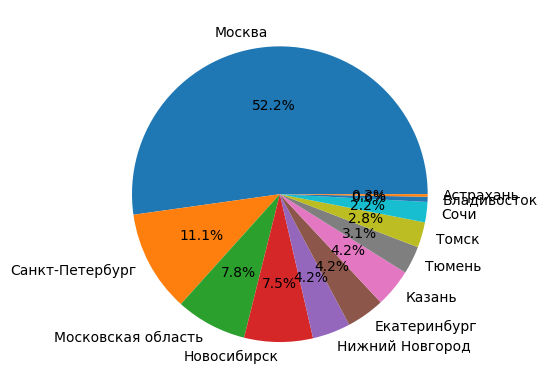

In [68]:
df['address'].value_counts().plot(kind='pie', label='', autopct='%1.1f%%')

Требуемый опыт

In [69]:
df['experience'].value_counts()

experience
От 3 до 6 лет         199
От 1 года до 3 лет    140
Более 6 лет            12
Нет опыта               9
Name: count, dtype: int64

График

<Axes: >

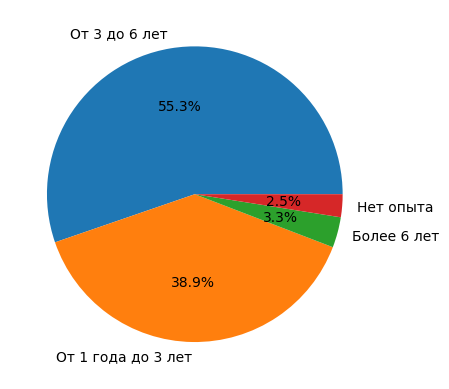

In [70]:
df['experience'].value_counts().plot(kind='pie', label='', autopct='%1.1f%%')

Описательные статистики

In [71]:
df['skills'].value_counts()

skills
Python, SQL                                                                                                                                                                                                                                                                                                                                                                                                                                                            7
Python, Machine Learning, Linux                                                                                                                                                                                                                                                                                                                                                                                                                                        6
MS SQL, PostgreSQL, API, Базы данных, Техническая поддержка                    

В каждой ячейке целый список необходимых навыков, требуется собрать их в один список и подсчитать частотность

Соединяю все строки в одну

In [72]:
skills = df['skills'].str.cat(sep= ' ')
print(skills)

Разработка технических заданий, Python, Сбор и анализ информации, Midjorney, Внедрение нейросетей, Нейросеть, ChatGPT, Работа в команде, Обучение и развитие, Stabile Diffusion, Работа с большим объемом информации SQL, jvm, Hadoop Знания математики, алгоритмов, структур данных, классического ML, CNN, YOLO, U-Net, ViT, Word2Vec, fasttext, RNN, трансформеры, Python, Linux, SQL, Git, PyTorch, TensorFlow Python, Machine Learning, Математическое моделирование, Spark, Data Science, Математическая статистика Python, Git, ООП, MySQL Python, NLP, Artificial intelligence, Искусственный интеллект, Machine Learning, Машинное обучение, Обработка естественного языка, Data science, Language Processing, Natural, ООП Большой интерес к инновациям в области медиа и технологий, Знание рынка существующих нейронных сетей и вариантов их применения, Проактивная позиция в вопросе применения нейронных сетей для задач производственной компании, Желание исследовать и креативить, Системное мышление, внимательность,

Удаляю во всей строке <,> и <;> и заменяю их на пустоту

In [73]:
skills = skills.replace(',', '').replace(';', '')
print(skills)

Разработка технических заданий Python Сбор и анализ информации Midjorney Внедрение нейросетей Нейросеть ChatGPT Работа в команде Обучение и развитие Stabile Diffusion Работа с большим объемом информации SQL jvm Hadoop Знания математики алгоритмов структур данных классического ML CNN YOLO U-Net ViT Word2Vec fasttext RNN трансформеры Python Linux SQL Git PyTorch TensorFlow Python Machine Learning Математическое моделирование Spark Data Science Математическая статистика Python Git ООП MySQL Python NLP Artificial intelligence Искусственный интеллект Machine Learning Машинное обучение Обработка естественного языка Data science Language Processing Natural ООП Большой интерес к инновациям в области медиа и технологий Знание рынка существующих нейронных сетей и вариантов их применения Проактивная позиция в вопросе применения нейронных сетей для задач производственной компании Желание исследовать и креативить Системное мышление внимательность нацеленность на результат умение работать в команде 

Разбиваю строку на список слов по пробелу

In [74]:
skills = skills.split()
print(skills)


['Разработка', 'технических', 'заданий', 'Python', 'Сбор', 'и', 'анализ', 'информации', 'Midjorney', 'Внедрение', 'нейросетей', 'Нейросеть', 'ChatGPT', 'Работа', 'в', 'команде', 'Обучение', 'и', 'развитие', 'Stabile', 'Diffusion', 'Работа', 'с', 'большим', 'объемом', 'информации', 'SQL', 'jvm', 'Hadoop', 'Знания', 'математики', 'алгоритмов', 'структур', 'данных', 'классического', 'ML', 'CNN', 'YOLO', 'U-Net', 'ViT', 'Word2Vec', 'fasttext', 'RNN', 'трансформеры', 'Python', 'Linux', 'SQL', 'Git', 'PyTorch', 'TensorFlow', 'Python', 'Machine', 'Learning', 'Математическое', 'моделирование', 'Spark', 'Data', 'Science', 'Математическая', 'статистика', 'Python', 'Git', 'ООП', 'MySQL', 'Python', 'NLP', 'Artificial', 'intelligence', 'Искусственный', 'интеллект', 'Machine', 'Learning', 'Машинное', 'обучение', 'Обработка', 'естественного', 'языка', 'Data', 'science', 'Language', 'Processing', 'Natural', 'ООП', 'Большой', 'интерес', 'к', 'инновациям', 'в', 'области', 'медиа', 'и', 'технологий', 'Зн

Оставляю только те слова, в которых больше чем 2 символа

In [78]:
skills = [skill for skill in skills if len(skill) > 2]
print(skills)

['Разработка', 'технических', 'заданий', 'Python', 'Сбор', 'анализ', 'информации', 'Midjorney', 'Внедрение', 'нейросетей', 'Нейросеть', 'ChatGPT', 'Работа', 'команде', 'Обучение', 'развитие', 'Stabile', 'Diffusion', 'Работа', 'большим', 'объемом', 'информации', 'SQL', 'jvm', 'Hadoop', 'Знания', 'математики', 'алгоритмов', 'структур', 'данных', 'классического', 'CNN', 'YOLO', 'U-Net', 'ViT', 'Word2Vec', 'fasttext', 'RNN', 'трансформеры', 'Python', 'Linux', 'SQL', 'Git', 'PyTorch', 'TensorFlow', 'Python', 'Machine', 'Learning', 'Математическое', 'моделирование', 'Spark', 'Data', 'Science', 'Математическая', 'статистика', 'Python', 'Git', 'ООП', 'MySQL', 'Python', 'NLP', 'Artificial', 'intelligence', 'Искусственный', 'интеллект', 'Machine', 'Learning', 'Машинное', 'обучение', 'Обработка', 'естественного', 'языка', 'Data', 'science', 'Language', 'Processing', 'Natural', 'ООП', 'Большой', 'интерес', 'инновациям', 'области', 'медиа', 'технологий', 'Знание', 'рынка', 'существующих', 'нейронны

Для частотного анализа использую библиотеку collections

In [79]:
from collections import Counter

Нахожу 30 самых часто встречающихся слов

In [80]:
Counter(skills).most_common(15)

[('Python', 252),
 ('SQL', 163),
 ('данных', 90),
 ('Data', 82),
 ('Learning', 67),
 ('Machine', 60),
 ('работы', 54),
 ('PyTorch', 47),
 ('NLP', 45),
 ('Spark', 41),
 ('Опыт', 39),
 ('Hadoop', 38),
 ('опыт', 37),
 ('Pandas', 33),
 ('Big', 33)]